<a href="https://colab.research.google.com/github/G3niy/MS/blob/main/SMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ввод данных:
ВАЖНО! Дробная часть вводится через точку, время измеряется в минутах

In [13]:
#@title .
max_transact_num = 120 #@param {type:"slider", min:1, max:1000, step:1}

entry_low = 1 #@param {type:"number"}
entry_mode = 5 #@param {type:"number"}
entry_high = 9 #@param {type:"number"}

service_low = 1 #@param {type:"number"}
service_mode = 5 #@param {type:"number"}
service_high = 9 #@param {type:"number"}



# Код:

In [14]:
#@title Импорт библиотек
from google.colab import data_table
data_table.enable_dataframe_formatter()

import random
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean

## 1) Генерация случайных величин

In [15]:
#@title Код
arr_entry = []
arr_service = []
for i in range(max_transact_num):
    arr_entry.append(round(random.triangular(entry_low, entry_high, entry_mode)))
    arr_service.append(round(random.triangular(service_low, service_high, service_mode)))

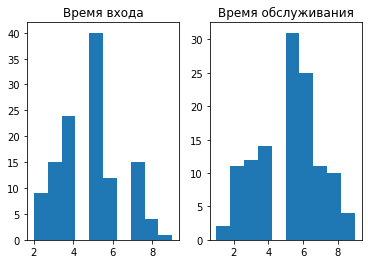

In [16]:
#@title Вывод
fig = plt.figure()
ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)
ax_1.set(title = 'Время входа')
ax_2.set(title = 'Время обслуживания')
ax_1.hist(arr_entry)
ax_2.hist(arr_service)
plt.show()

## 2) Процессно-ориентированная модель

In [ ]:
#@title Код
arrival_time = []
waiting_time = []
occupied_time = []
free_time = []
order = []

arrival_time.append(0)
waiting_time.append(0)
occupied_time.append(0)
free_time.append(0 + arr_service[0])
transact = 1
order.append(transact)

while(transact < max_transact_num):
    arrival_time.append(arrival_time[-1] + arr_entry[transact])    
    occupied_time.append(max(arrival_time[-1], free_time[-1]))
    waiting_time.append(occupied_time[-1] - arrival_time[-1])
    free_time.append(occupied_time[-1] + arr_service[transact])
    transact += 1
    order.append(transact)

In [ ]:
#@title Вывод по процессно-ориентированной модели:
print('Обслужено клиентов:', order[-1])
print('Максимальное время ожидания:', max(waiting_time), '  Среднее:', mean(waiting_time))
df = pd.DataFrame({
    'Номер транзакта': order,
    'Время поступления': arrival_time,
    'Время ожидания': waiting_time,
    'Время занятия УО': occupied_time,
    'Время освобождения УО': free_time
    })
df

Обслужено клиентов: 100
Максимальное время ожидания: 44   Среднее: 20.89


,Номер транзакта,Время поступления,Время ожидания,Время занятия УО,Время освобождения УО
0,1,0,0,0,4
1,2,8,0,8,11
2,3,12,0,12,18
3,4,19,0,19,25
4,5,26,0,26,31
...,...,...,...,...,...
95,96,571,39,610,616
96,97,580,36,616,625
97,98,586,39,625,630
98,99,591,39,630,639


## 3) Имитационная модель (повременная)

In [ ]:
#@title Время работы
max_global_time = 150 #@param {type:"slider", min:20, max:720, step:10}

dt по умолчанию 1 минута

In [ ]:
#@title Предварительные расчеты
arrival_time = []
arrival_time.append(0)
for i in range(max_transact_num):
    arrival_time.append(arrival_time[-1] + arr_entry[i])
#arrival_time

In [ ]:
#@title Код
check_global_time = []
check_queue = []
check_UO = []
check_UO_time = []
check_UO_transact = []

queue = []
UO  = True
UO_time = 0
global_time = 1
service_transact = 0
next_transact = 1

order = []
check_global_time.append(0)
check_queue.append(0)
check_UO.append(UO)
check_UO_time.append(UO_time)
check_UO_transact.append(0)

while (global_time < max_global_time):
    if(UO): 
        UO_time += 1
    if(UO_time == arr_service[service_transact]):
        #out = True
        UO = False
        UO_time = 0
        order.append(service_transact)
        service_transact = -1       
    if(global_time == arrival_time[next_transact]):
        #input = True
        queue.append(next_transact)
        if (next_transact < max_transact_num - 1):
            next_transact += 1       
    if(not UO) and (len(queue) != 0):
        service_transact = queue[0]
        queue.pop(0)
        UO = True
        UO_time = 0
    
    check_global_time.append(global_time)
    check_queue.append(len(queue))
    check_UO.append(UO)
    check_UO_time.append(UO_time)
    check_UO_transact.append(service_transact)
    
    global_time += 1

In [ ]:
#@title Вывод
print('Было полностью обслужено транзактов:', max(order)+1)
print('Средняя длина очереди:', '%.1f' % mean(check_queue), ' Максимальная длина очереди:', max(check_queue))
check = pd.DataFrame({
    'Общее время': check_global_time,
    'Длина очереди': check_queue,
    'Состояние УО': check_UO,
    'Обслуживаемый транзакт': check_UO_transact,
    'Время занятия УО': check_UO_time
    })
check

Было полностью обслужено транзактов: 24
Средняя длина очереди: 0.2  Максимальная длина очереди: 1


,Общее время,Длина очереди,Состояние УО,Обслуживаемый транзакт,Время занятия УО
0,0,0,True,0,0
1,1,0,True,0,1
2,2,0,True,0,2
3,3,0,True,0,3
4,4,0,False,-1,0
...,...,...,...,...,...
145,145,0,True,23,2
146,146,1,True,23,3
147,147,0,True,24,0
148,148,0,True,24,1


## 4) Событийная модель

In [ ]:
#@title Время работы
max_global_time = 220 #@param {type:"slider", min:20, max:720, step:10}

In [ ]:
#@title Предварительные расчеты
arrival_time = []
arrival_time.append(0)
for i in range(max_transact_num):
    arrival_time.append(arrival_time[-1] + arr_entry[i])
arrival_time

In [ ]:
#@title Код
queue = []
UO  = True
trans_in = 0
trans_s = -1
s_free_time = 0 + arr_service[0]
curr_time = 0
ev = 0

n_event = []
event = []
queue_len = []
curr_trans_s = []
time = []
queue.append(0)
trans_in += 1

event.append(0)
time.append(0)
queue_len.append(len(queue))
curr_trans_s.append(trans_s)
n_event.append('input')


while(True):
    event_time = min(arrival_time[trans_in], s_free_time, max_global_time)
    curr_time = event_time
    if curr_time >= max_global_time:
        event_name = 'end'
        break
    if curr_time == arrival_time[trans_in]:
        queue.append(trans_in)
        trans_in += 1
        event_name = 'input'
    else:
        UO = False
        event_name = 'complete'
    if (len(queue) != 0) and not UO:
        trans_s = queue[0]
        queue.pop(0)
        UO  = True
        s_free_time = curr_time + arr_service[trans_s]
    elif(len(queue) == 0):
        s_free_time = 1000
        trans_s = -1

    ev += 1
    event.append(ev)
    n_event.append(event_name)
    queue_len.append(len(queue))
    curr_trans_s.append(trans_s)
    time.append(curr_time)


In [ ]:
#@title Вывод
check_event = pd.DataFrame({
    '# события': event,
    'Время': time,
    'Событие': n_event,
    'Длина очереди': queue_len,
    'Обслуживаемый транзакт': curr_trans_s
    })
check_event

,# события,Время,Событие,Длина очереди,Обслуживаемый транзакт
0,0,0,input,1,-1
1,1,4,complete,0,0
2,2,6,input,1,0
3,3,8,complete,0,1
4,4,14,input,1,1
...,...,...,...,...,...
64,64,195,complete,1,31
65,65,199,complete,0,32
66,66,201,input,1,32
67,67,204,input,2,32
